# The Bank Marketing Problem  

## Client Atributes

| Column      | Description                                                                                    |
| ----------- | ---------------------------------------------------------------------------------------------- |
| `age`       | Age of the client (numeric).                                                                   |
| `job`       | Type of job (categorical). Examples: `admin.`, `technician`, `blue-collar`, `management`, etc. |
| `marital`   | Marital status (categorical). Values: `married`, `single`, `divorced`.                         |
| `education` | Education level (categorical). Values: `primary`, `secondary`, `tertiary`, `unknown`.          |
| `default`   | Has credit in default? (categorical). Values: `yes`, `no`, `unknown`.                          |
| `balance`   | Average yearly balance in euros (numeric).                                                     |
| `housing`   | Has a housing loan? (categorical). Values: `yes`, `no`, `unknown`.                             |
| `loan`      | Has a personal loan? (categorical). Values: `yes`, `no`, `unknown`.                            |

## Contact attributes

| Column     | Description                                                                                                                |
| ---------- | -------------------------------------------------------------------------------------------------------------------------- |
| `contact`  | Communication type (categorical). Values: `cellular`, `telephone`.                                                         |
| `day`      | Last contact day of the month (numeric).                                                                                   |
| `month`    | Last contact month of the year (categorical). Values: `jan`, `feb`, `mar`, etc.                                            |
| `duration` | Last campaign contact duration, in seconds (numeric).  |

## Campaing Attributes

| Column     | Description                                                                                                                           |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| `campaign` | Number of contacts performed during this campaign for this client (numeric, includes last contact).                                   |
| `pdays`    | Number of days that passed after the client was last contacted in a previous campaign (-1 means client was not previously contacted). |
| `previous` | Number of contacts performed before this campaign for this client (numeric).                                                          |
| `poutcome` | Outcome of the previous marketing campaign (categorical). Values: `success`, `failure`, `other`, `unknown`.                           |


## Dataset Exploration

A preview of the information inside the datasets:

In [5]:
import requests
import zipfile
import io
import pandas as pd


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
r = requests.get(url)

# Open the zip file in memory
z = zipfile.ZipFile(io.BytesIO(r.content))

# Extract and read "bank.csv"
df = pd.read_csv(z.open("bank-full.csv"), sep=";")

print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
df_sample = df.sample(n=500, random_state=42)  # random_state ensures reproducibility
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Attributes Distribution


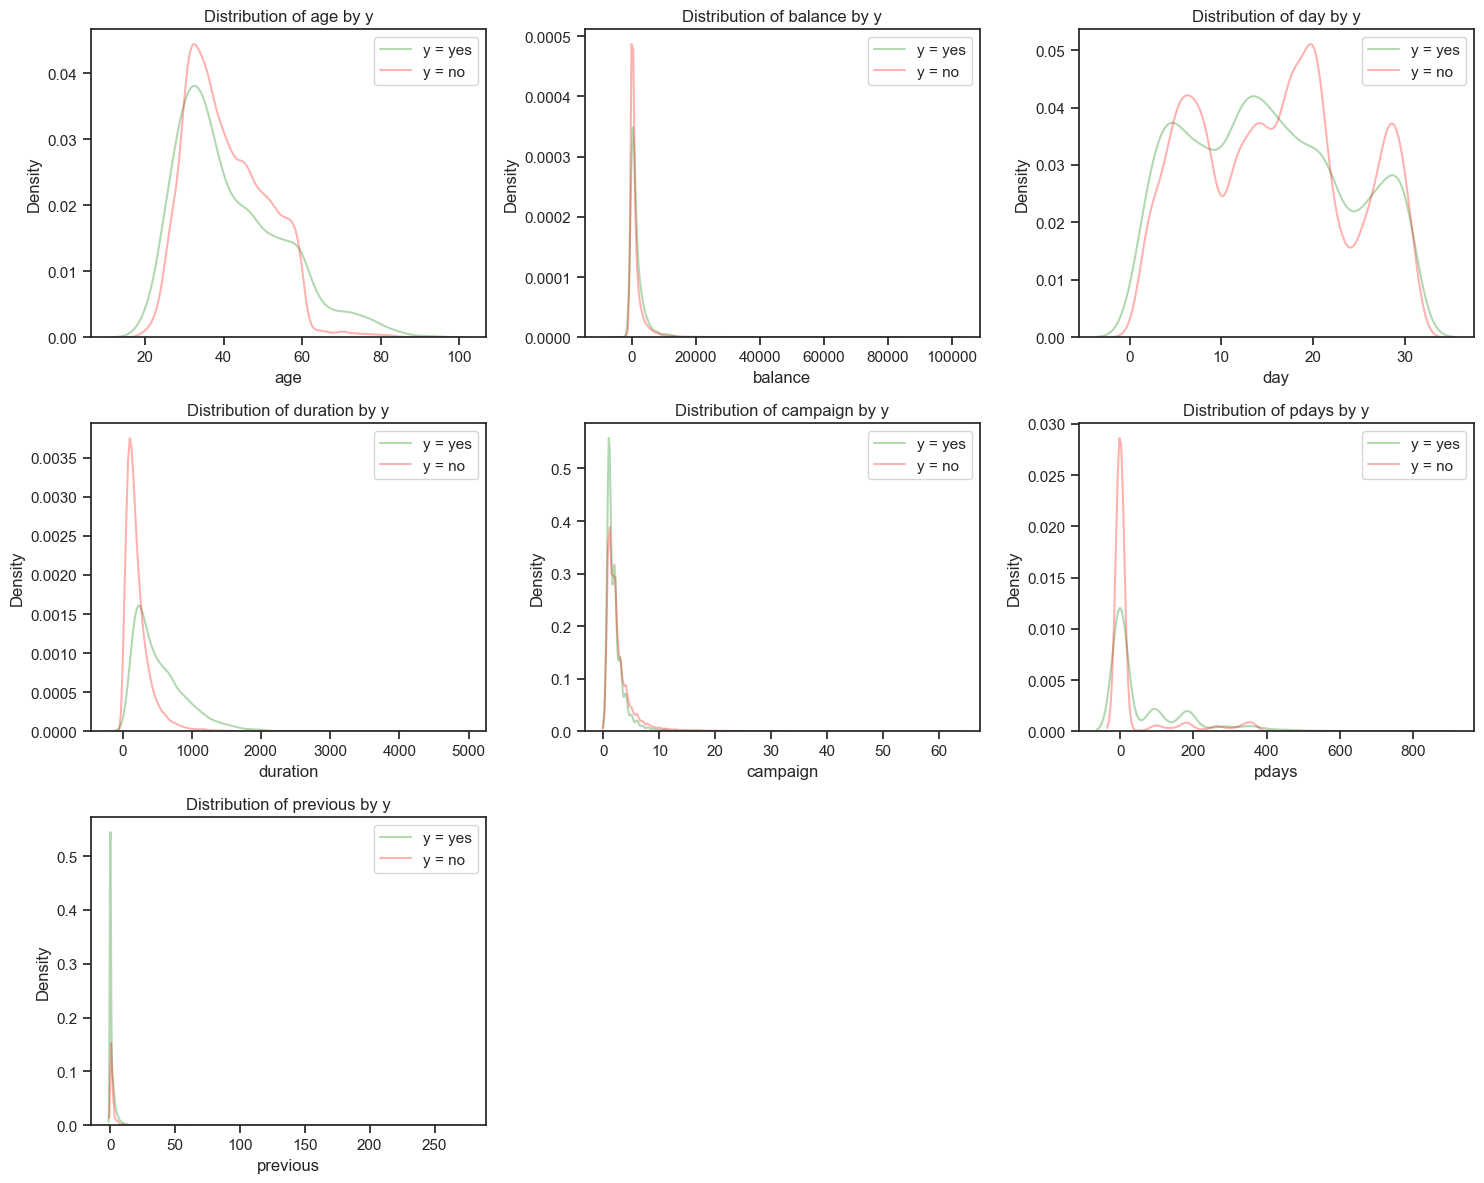

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Loop over variables
for i, var in enumerate(variables):
    ax = axes[i]
    
    df_plot = df.copy()
    
    # Plot distributions by 'y'
    sns.kdeplot(df_plot[df_plot['y'] == 'yes'][var], ax=ax, color='green', fill=False, alpha=0.3, label='y = yes')
    sns.kdeplot(df_plot[df_plot['y'] == 'no'][var], ax=ax, color='red', fill=False, alpha=0.3, label='y = no')
    
    ax.set_title(f'Distribution of {var} by y')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.legend()

# Remove unused axes if any
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


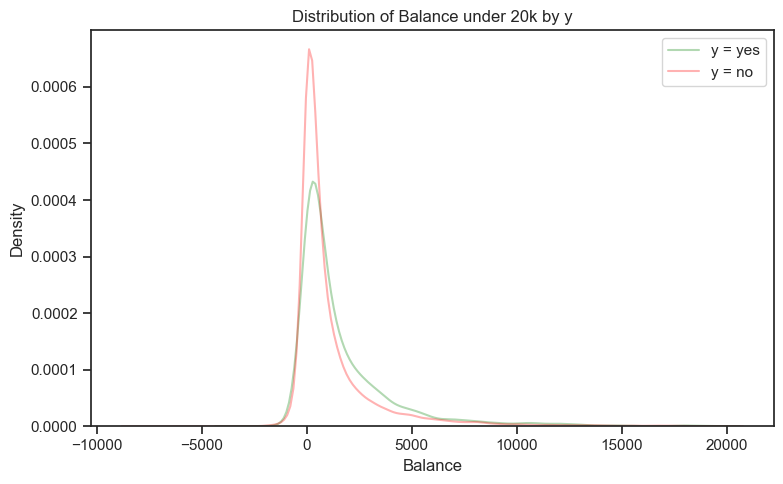

In [ ]:
%matplotlib inline


# Filter full dataframe (keep balance < 20000)
df_plot = df[df['balance'] < 20000]

plt.figure(figsize=(8,5))

# Plot KDE by 'y'
sns.kdeplot(df_plot[df_plot['y'] == 'yes']['balance'], color='green', fill=False, alpha=0.3, label='y = yes')
sns.kdeplot(df_plot[df_plot['y'] == 'no']['balance'], color='red', fill=False, alpha=0.3, label='y = no')

plt.title('Distribution of Balance under 20k by y')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
upper_bound = df['balance'].quantile(0.99)

df_99 = df[df['balance']>= upper_bound]

percentages = df['y'].value_counts(normalize=True) * 100


print("Proportion in the target variable: ",percentages)

Proportion in the target variable:  y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [ ]:
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

Proportion in the target variable:  y
no     88.07947
yes    11.92053
Name: proportion, dtype: float64


In [ ]:
df['balance'] = df['balance'].clip(upper=upper_bound)

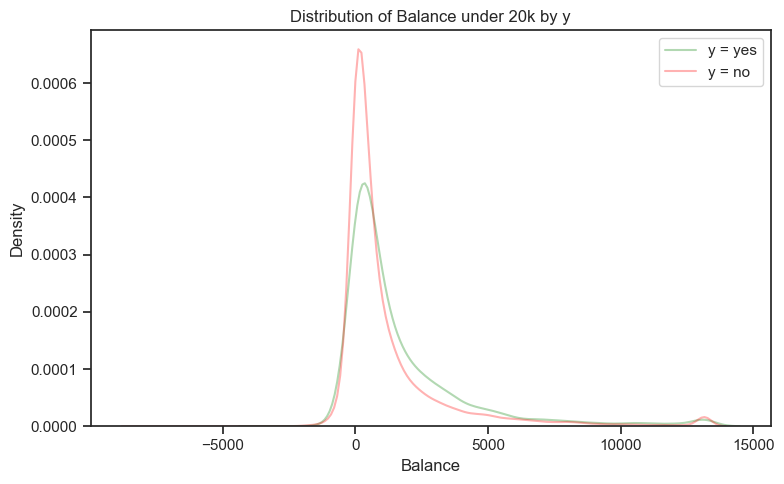

In [ ]:
%matplotlib inline


# Filter full dataframe (keep balance < 20000)
df_plot = df[df['balance'] < 20000]

plt.figure(figsize=(8,5))

# Plot KDE by 'y'
sns.kdeplot(df_plot[df_plot['y'] == 'yes']['balance'], color='green', fill=False, alpha=0.3, label='y = yes')
sns.kdeplot(df_plot[df_plot['y'] == 'no']['balance'], color='red', fill=False, alpha=0.3, label='y = no')

plt.title('Distribution of Balance by y')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Duration

In [ ]:
upper_bound = df['duration'].quantile(0.99)

df_99 = df[df['duration']>= upper_bound]

print(upper_bound)
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

1269.0
Proportion in the target variable:  y
yes    61.453744
no     38.546256
Name: proportion, dtype: float64


## campaign

In [ ]:
upper_bound = df['campaign'].quantile(0.99)

df_99 = df[df['campaign']>= upper_bound]

print(upper_bound)
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

16.0
Proportion in the target variable:  y
no     97.54717
yes     2.45283
Name: proportion, dtype: float64


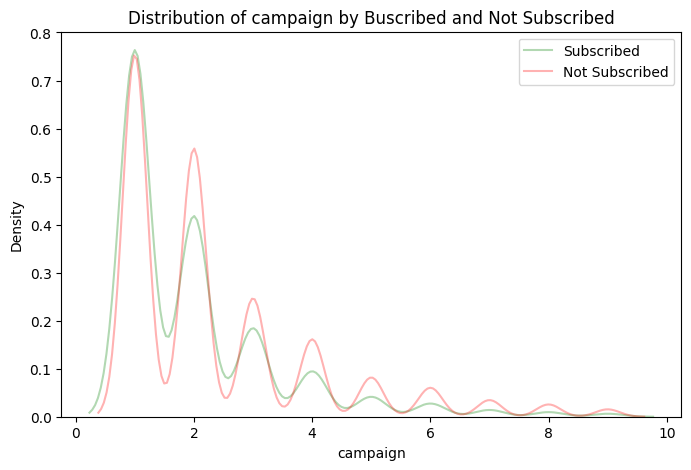

In [29]:
name_variable = "campaign"

df_plot = df[df[name_variable] < 10]
plt.figure(figsize=(8,5))

# Plot KDE by 'y'
sns.kdeplot(df_plot[df_plot['y'] == 'yes'][name_variable], color='green', fill=False, alpha=0.3, label='Subscribed')
sns.kdeplot(df_plot[df_plot['y'] == 'no'][name_variable], color='red', fill=False, alpha=0.3, label='Not Subscribed')

plt.title(f'Distribution of {name_variable} by Buscribed and Not Subscribed')
plt.xlabel(name_variable)
plt.ylabel('Density')
plt.legend()
plt.show()

## p days

In [ ]:
upper_bound = df['pdays'].quantile(0.99)

df_99 = df[df['pdays']>= upper_bound]

print(upper_bound)
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

370.0
Proportion in the target variable:  y
no     63.429752
yes    36.570248
Name: proportion, dtype: float64


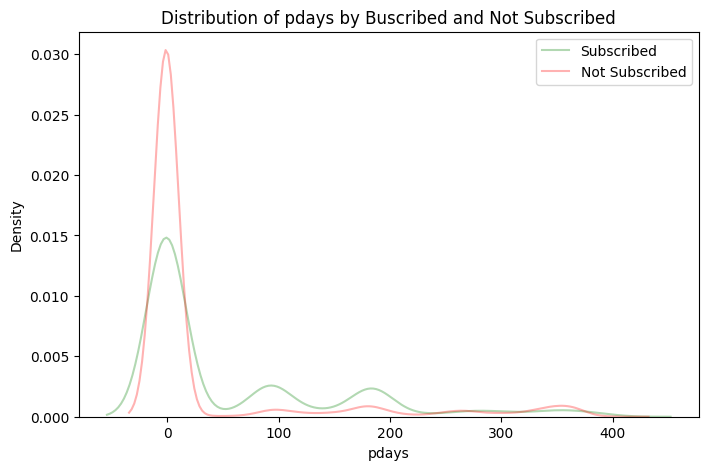

In [21]:
name_variable = "pdays"

df_plot = df[df[name_variable] < 400]
plt.figure(figsize=(8,5))

# Plot KDE by 'y'
sns.kdeplot(df_plot[df_plot['y'] == 'yes'][name_variable], color='green', fill=False, alpha=0.3, label='Subscribed')
sns.kdeplot(df_plot[df_plot['y'] == 'no'][name_variable], color='red', fill=False, alpha=0.3, label='Not Subscribed')

plt.title(f'Distribution of {name_variable} by Buscribed and Not Subscribed')
plt.xlabel(name_variable)
plt.ylabel('Density')
plt.legend()
plt.show()

In [23]:
df['days_since_previous_contact'] = pd.cut(
    df['pdays'],
    bins=[-2,0,150,230,310,380,1000],   # intervals
    labels=[
        "No contact",
        "0 - 5 months", "5 - 8 months", "8 - 11 months", "Around a year", "More than a year"
    ]
)

df['days_since_previous_contact'].value_counts()

days_since_previous_contact
No contact          36954
0 - 5 months         2346
5 - 8 months         2228
Around a year        2035
8 - 11 months        1353
More than a year      295
Name: count, dtype: int64

C:\Users\crist\AppData\Local\Temp\ipykernel_17444\1735196796.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([name_variable, "y"]).size().unstack(fill_value=0)


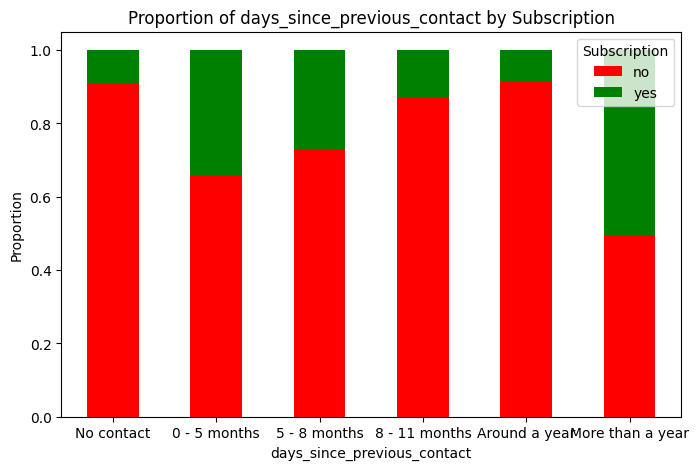

In [26]:

name_variable = "days_since_previous_contact"
counts = df.groupby([name_variable, "y"]).size().unstack(fill_value=0)


# Normalize row-wise → proportions per contact category
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plot
proportions.plot(
    kind="bar",
    stacked=True,       # stacked to see proportion in same bar
    figsize=(8,5),
    color={"no": "red", "yes": "green"}
)

plt.title(f'Proportion of {name_variable} by Subscription')
plt.xlabel(name_variable)
plt.ylabel('Proportion')
plt.legend(title="Subscription")
plt.xticks(rotation=0)
plt.show()

## Previuos

In [ ]:
upper_bound = df['previous'].quantile(0.99)

df_99 = df[df['previous']>= upper_bound]

print(upper_bound)
percentages_outliers = df_99['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentages_outliers)

8.900000000001455
Proportion in the target variable:  y
no     77.041943
yes    22.958057
Name: proportion, dtype: float64


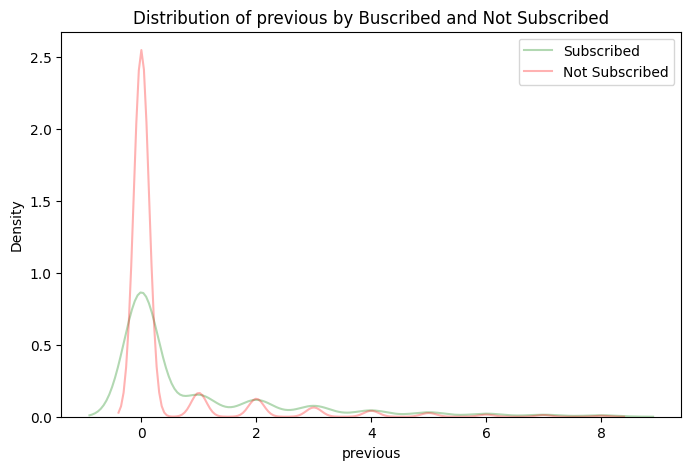

In [ ]:
%matplotlib inline


# Filter full dataframe (keep balance < 20000)

name_variable = "previous"

df_plot = df[df['previous'] < 9]
plt.figure(figsize=(8,5))

# Plot KDE by 'y'
sns.kdeplot(df_plot[df_plot['y'] == 'yes'][name_variable], color='green', fill=False, alpha=0.3, label='Subscribed')
sns.kdeplot(df_plot[df_plot['y'] == 'no'][name_variable], color='red', fill=False, alpha=0.3, label='Not Subscribed')

plt.title(f'Distribution of {name_variable} by Buscribed and Not Subscribed')
plt.xlabel(name_variable)
plt.ylabel('Density')
plt.legend()
plt.show()


n_previous_contacts
No contact     2772
1              2106
2              1142
3               714
More than 6     582
4               459
5               277
6               205
Name: count, dtype: int64

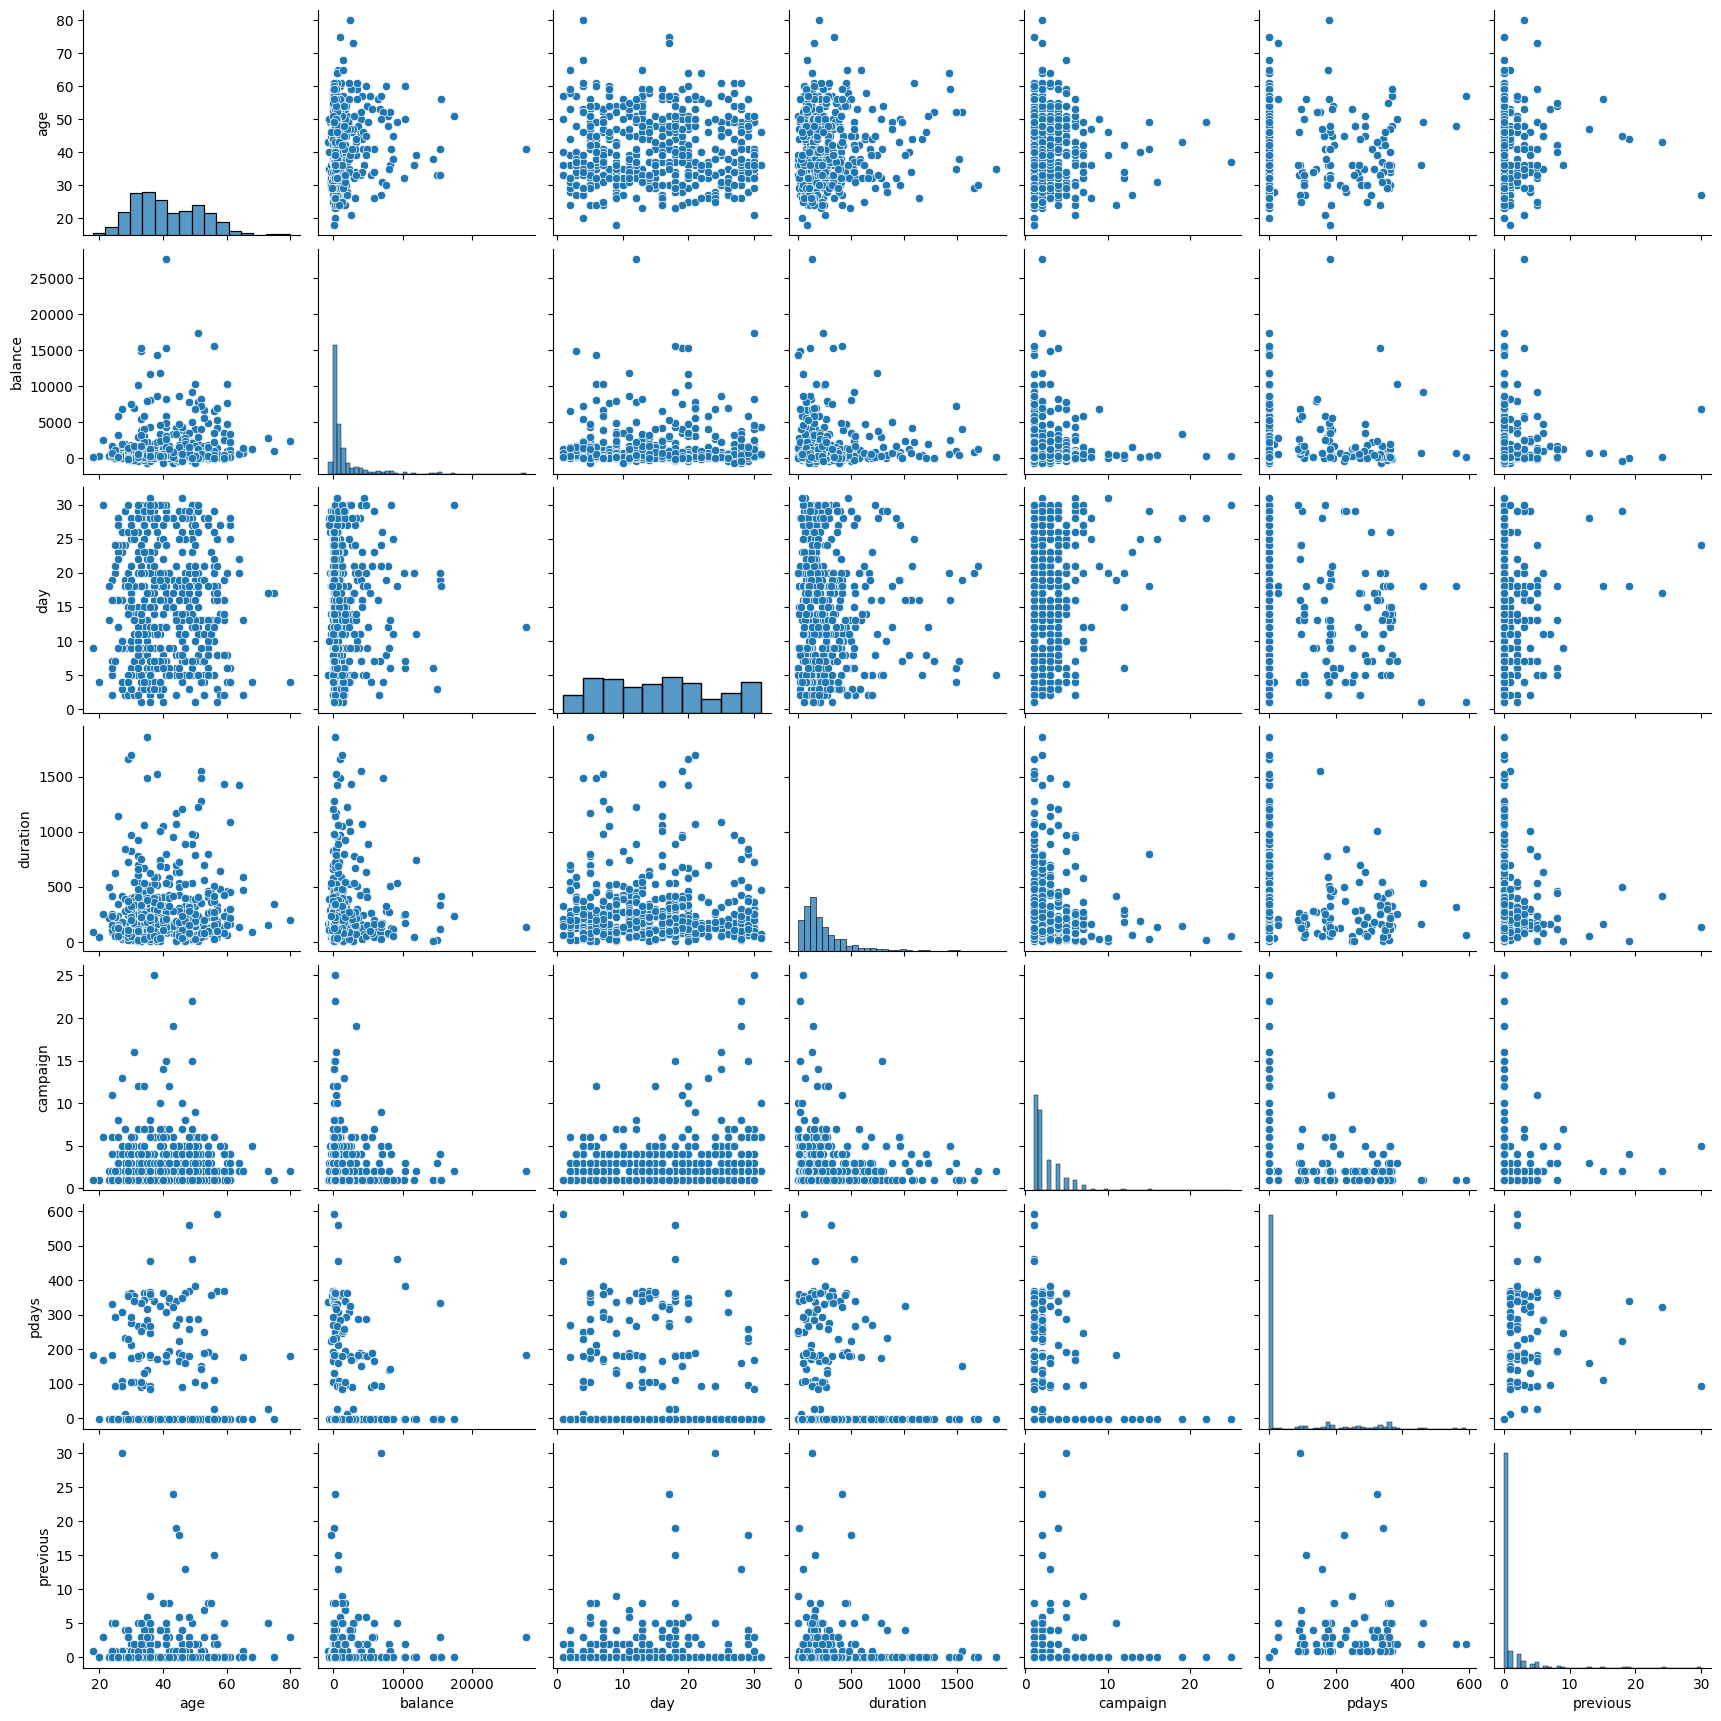

In [13]:
%matplotlib inline
sns.pairplot(data=df_sample)

df['n_previous_contacts'] = pd.cut(
    df['previous'],
    bins=[0,1,2,3,4,5,6,7,300],   # intervals
    labels=[
        "No contact",
        "1", "2", "3", "4", "5", "6",
        "More than 6"
    ]
)

df['n_previous_contacts'].value_counts()

C:\Users\crist\AppData\Local\Temp\ipykernel_17444\1278133165.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([name_variable, "y"]).size().unstack(fill_value=0)


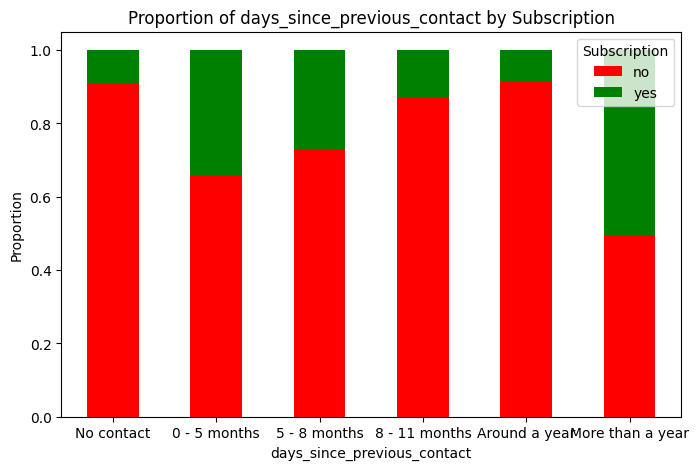

In [27]:
%matplotlib inline


counts = df.groupby([name_variable, "y"]).size().unstack(fill_value=0)


# Normalize row-wise → proportions per contact category
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plot
proportions.plot(
    kind="bar",
    stacked=True,       # stacked to see proportion in same bar
    figsize=(8,5),
    color={"no": "red", "yes": "green"}
)

plt.title(f'Proportion of {name_variable} by Subscription')
plt.xlabel(name_variable)
plt.ylabel('Proportion')
plt.legend(title="Subscription")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.groupby()

In [19]:
print(proportions)

y                          no       yes
n_previous_contacts                    
No contact           0.789683  0.210317
1                    0.783476  0.216524
2                    0.742557  0.257443
3                    0.760504  0.239496
4                    0.736383  0.263617
5                    0.700361  0.299639
6                    0.736585  0.263415
More than 6          0.697674  0.302326


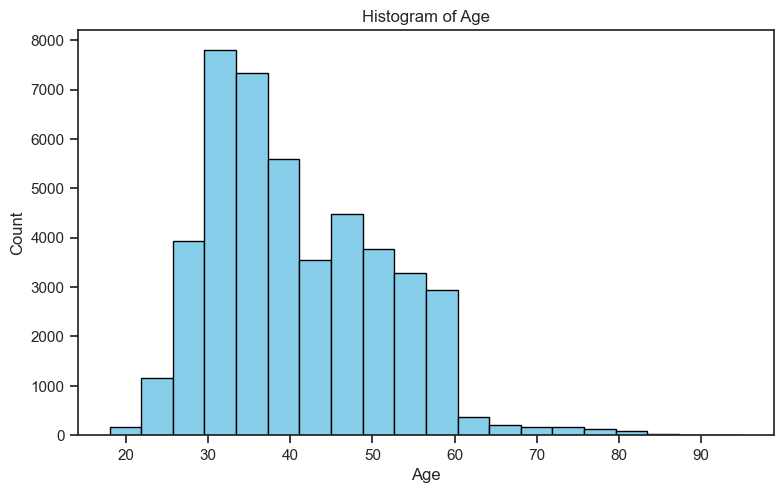

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [38]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [ ]:
# Select a subset of numeric features for the heatmap for clarity
numeric_subset = [
    'lead_time', 'total_guests', 'total_nights', 'previous_cancellations',
    'booking_changes', 'adr', 'total_of_special_requests', 'is_canceled'
]
corr_matrix = df[numeric_subset].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Numeric Features')
plt.show()

## Heuristic Logic

In [39]:
df_yes_likely = df[((df["age"] > 55)  | (df["age"] < 35)) & (df["balance"] > 800)& (df["day"] < 15)& (df["pdays"] > 0)]

df_yes_likely.info()
percentage= df_yes_likely['y'].value_counts(normalize=True) * 100
print("Proportion in the target variable: ",percentage)


<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 24136 to 45179
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          788 non-null    int64   
 1   job                          788 non-null    object  
 2   marital                      788 non-null    object  
 3   education                    788 non-null    object  
 4   default                      788 non-null    object  
 5   balance                      788 non-null    int64   
 6   housing                      788 non-null    object  
 7   loan                         788 non-null    object  
 8   contact                      788 non-null    object  
 9   day                          788 non-null    int64   
 10  month                        788 non-null    object  
 11  duration                     788 non-null    int64   
 12  campaign                     788 non-null    int64   
 13  pday